In [107]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import networks
import torch.nn.functional as F
import scipy.ndimage as ndimage
from torch.autograd import Variable
from networks import *
import numpy as np
import config as cf
import torch.optim as optim
from itertools import starmap
import math
import scipy
import scipy.stats as stats

In [ ]:
matrices_

In [108]:
sig = 0
torch.manual_seed(2809)
transform_train = transforms.Compose(
    [transforms.RandomCrop(32, padding=4),
     transforms.RandomHorizontalFlip(),
     transforms.ToTensor(),
     #transforms.Normalize((0.5071, 0.4867, 0.4408), (0.2675, 0.2565, 0.2761)),
     #transforms.Lambda(lambda x: ndimage.gaussian_filter(x, sigma=sig)),
     #transforms.ToPILImage(),
     #transforms.ToTensor()
])

transform_test = transforms.Compose([
    #transforms.Lambda(lambda x: ndimage.gaussian_filter(x, sigma=sig)),
     transforms.ToTensor(),
     #transforms.Normalize((0.5071, 0.4867, 0.4408), (0.2675, 0.2565, 0.2761))
])

trainset = torchvision.datasets.CIFAR100(root='./data', train=True,
                                        download=True, transform=transform_train)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=128,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR100(root='./data', train=False,
                                       download=True, transform=transform_test)
testloader = torch.utils.data.DataLoader(testset, batch_size=100,
                                         shuffle=False, num_workers=2)

Files already downloaded and verified
Files already downloaded and verified


In [81]:
trainset[0][0].mean(dim=(1,2), keepdim=True)

tensor([[[0.5914]],

        [[0.5829]],

        [[0.4527]]])

    a = np.asanyarray(a)
    m = a.mean(axis)
    sd = a.std(axis=axis, ddof=ddof)
    return np.where(sd == 0, 0, m/sd)

In [35]:
m = np.mean(trainset.data, axis=(0,1,2))/255

In [36]:
sd = np.std(trainset.data, axis=(0,1,2))/255

In [24]:
a = trainset.data[0]

In [104]:
m = f.cpu().detach().numpy().mean(axis=1, keepdims=True)
sd = f.cpu().detach().numpy().std(axis=1, keepdims=True)

In [99]:
f = f.view(f.shape[0],-1)

In [106]:
np.where(sd==0, 0, m/sd).shape

(128, 1)

In [38]:
np.where(sd==0, 0, m/sd)

array([1.89678311, 1.89733189, 1.59665794])

In [12]:
x = torch.Tensor([[1,2], [3,4]])

In [ ]:
[ndimage.gaussian_filter(transforms.ToPILImage(img), sigma=sig) for img in x]

In [109]:
checkpoint1 = torch.load("./checkpoint/cifar100/resnet-50_similarity_regularized_layerwiseRegStrength_lambda40.0_eta0.02.t7")
checkpoint2 = torch.load("./checkpoint/cifar100/resnet-50_readout_match_SNRNormalized.t7")
#cpt3 = torch.load("./checkpoint/cifar100/resnet-50_gaussianRand.t7")
#cpt4 = torch.load("./checkpoint/cifar100/resnet-50_clean.t7")
net_rob = checkpoint2['net']
net_reg = checkpoint1['net']
#net_rand = cpt3['net']
#net_clean = cpt4['net']
net_orig = ResNet_2Read(50,10).cuda()
#net_gauss = torch.nn.DataParallel(net_gauss, device_ids=range(torch.cuda.device_count()))
net_reg = torch.nn.DataParallel(net_reg, device_ids=[0])
net_rob = torch.nn.DataParallel(net_rob, device_ids=[0])#

/usr/local/lib/python3.6/dist-packages/torch/serialization.py:435: SourceChangeWarning: source code of class 'networks.resnet.ResNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:435: SourceChangeWarning: source code of class 'networks.resnet.Bottleneck' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:435: SourceChangeWarning: source code of class 'networks.resnet.ResNet_2Read' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump

TypeError: 'DataLoader' object does not support indexing

In [50]:
from sklearn.cluster import AgglomerativeClustering

In [8]:
ind21 = np.argsort(clustering21.labels_)

In [51]:
clusters = [AgglomerativeClustering(n_clusters=12).fit(torch.sqrt(1-matrices_g[i].detach().cpu())) for i in range(0, len(matrices_g))]

In [52]:
indices = [np.argsort(cluster.labels_) for cluster in clusters]

### Plotting Code

In [54]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
from matplotlib import cm
#from colorspacious import cspace_converter
#from collections import OrderedDict

In [55]:
titles = ["Robust (readout matching)", "Trained on Clean Images, Similarity Regularized on All Layers (lambda=40, eta=0.02)"]

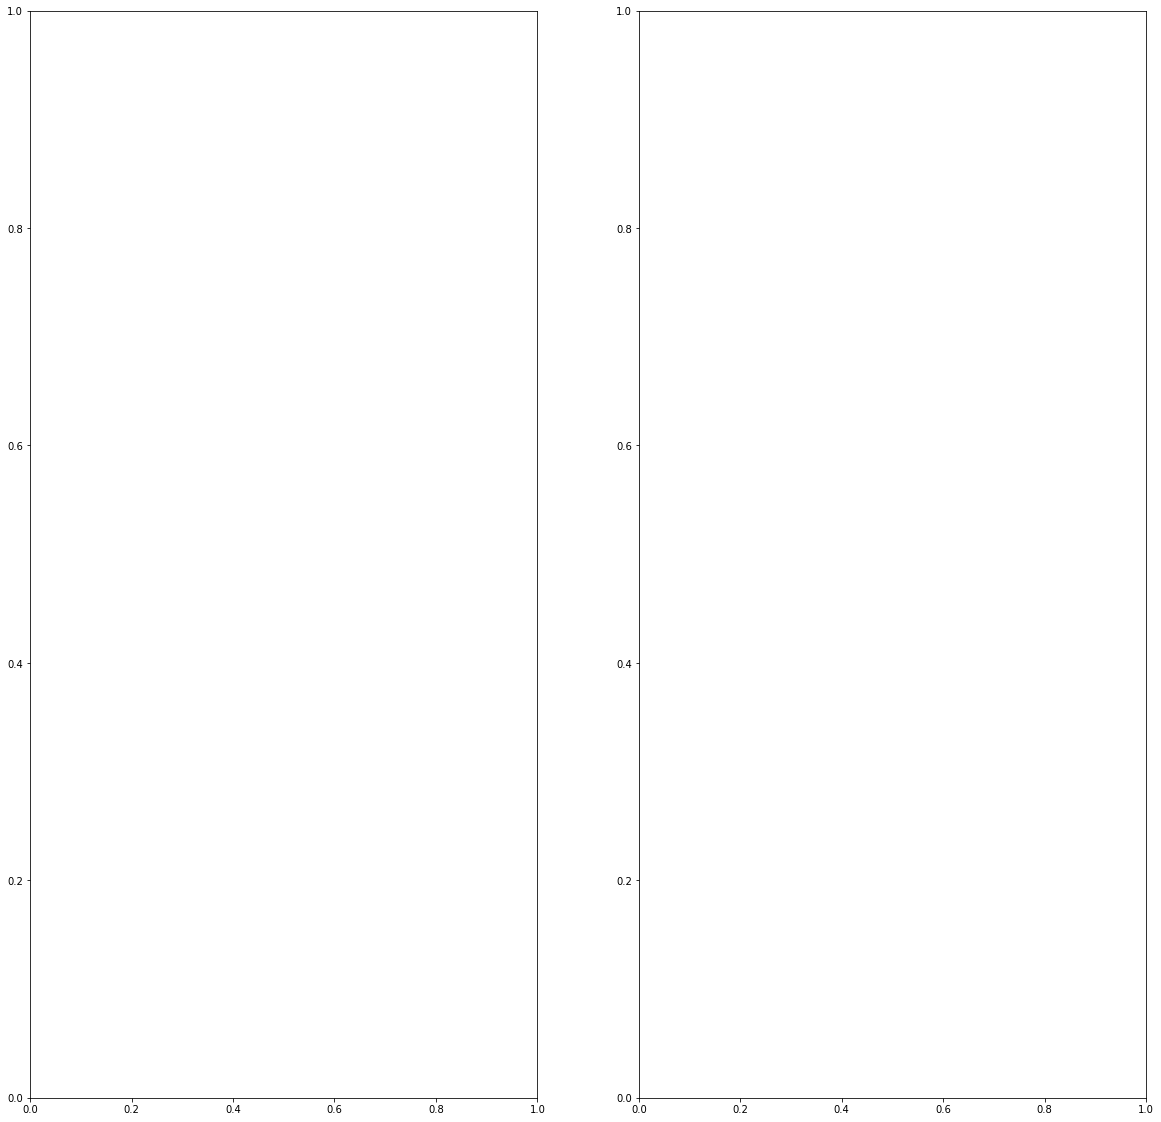

In [56]:
f, axs = plt.subplots(1,2,figsize=(20,20))

In [57]:
i = 40
axs[0].matshow(matrices_g[i][indices[i]][:,indices[i]].detach().cpu(), cmap=cm.get_cmap(name="Spectral_r"))
axs[1].matshow(matrices_r[i][indices[i]][:,indices[i]].detach().cpu(), cmap=cm.get_cmap(name="Spectral_r"))
f.suptitle("Layer "+str(i)+" Batch-wise Correlation Similarity Matrices", fontsize=20)

Text(0.5, 0.98, 'Layer 40 Batch-wise Correlation Similarity Matrices')

In [70]:
torch.Tensor(indices)

torch.Size([128])

In [58]:
for ax, col in zip(axs, titles):
    ax.set_title(col, pad=35, fontsize=20)
    ax.tick_params(axis="x", labelsize=20)
    ax.tick_params(axis="y", labelsize=20)
f.tight_layout()

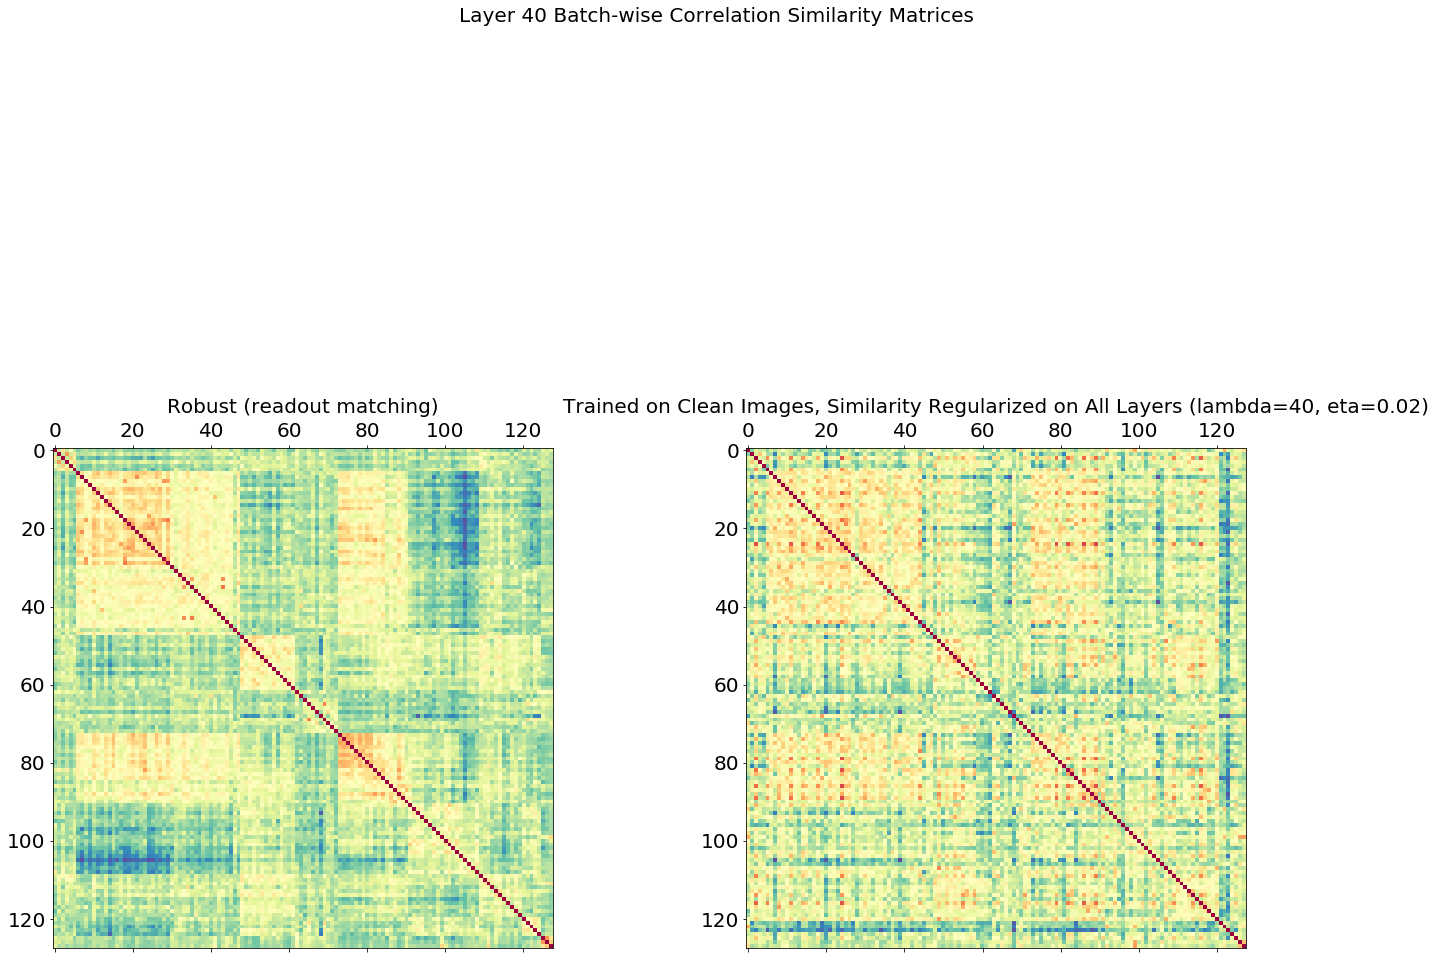

In [59]:
f

In [16]:
f.savefig("layer_42_matrices_lambda1.1_eta0.02.png")

In [74]:
torch.save(indices,"indices.pt")

In [331]:
reg = [m for (i,m) in list_r]
gauss = [m for (i,m) in list_g]
unreg = [m for (i,m) in list_u]

In [19]:
for i in range(0, len(matrices_g)):
    axs[0].matshow(matrices_g[i][indices[i]][:,indices[i]].detach().cpu(), cmap=cm.get_cmap(name="Spectral_r"))
    axs[1].matshow(matrices_r[i][indices[i]][:,indices[i]].detach().cpu(), cmap=cm.get_cmap(name="Spectral_r"))
    #axs[2].matshow(matrices_u[0][ind1][:,ind1].detach().cpu(), cmap=cm.get_cmap(name="Spectral"))
    f.suptitle("Layer "+str(i)+" Batch-Wise Cosine Similarity Matrices", fontsize=20)
    f.savefig("./Similarity Matrices for All Layers/Layerwise Similarity Regularization (proper Transformation)/layer_"+str(i)+"_matrices")

In [7]:
[torch.isnan(torch.sqrt(1-matrix)).max() for matrix in matrices_g]
#torch.isnan(torch.sqrt(1-matrices_g[4])).max()

[tensor(0, device='cuda:0', dtype=torch.uint8),
 tensor(0, device='cuda:0', dtype=torch.uint8),
 tensor(0, device='cuda:0', dtype=torch.uint8),
 tensor(0, device='cuda:0', dtype=torch.uint8),
 tensor(1, device='cuda:0', dtype=torch.uint8),
 tensor(0, device='cuda:0', dtype=torch.uint8),
 tensor(0, device='cuda:0', dtype=torch.uint8),
 tensor(0, device='cuda:0', dtype=torch.uint8),
 tensor(0, device='cuda:0', dtype=torch.uint8),
 tensor(0, device='cuda:0', dtype=torch.uint8),
 tensor(0, device='cuda:0', dtype=torch.uint8),
 tensor(0, device='cuda:0', dtype=torch.uint8),
 tensor(0, device='cuda:0', dtype=torch.uint8),
 tensor(0, device='cuda:0', dtype=torch.uint8),
 tensor(0, device='cuda:0', dtype=torch.uint8),
 tensor(0, device='cuda:0', dtype=torch.uint8),
 tensor(0, device='cuda:0', dtype=torch.uint8),
 tensor(0, device='cuda:0', dtype=torch.uint8),
 tensor(0, device='cuda:0', dtype=torch.uint8),
 tensor(0, device='cuda:0', dtype=torch.uint8),
 tensor(0, device='cuda:0', dtype=torch.

In [8]:
matrices_g[4][torch.sqrt(1-matrices_g[4]) !=torch.sqrt(1-matrices_g[4])] = 0

### Clustering

In [29]:
matrices_r[3][ind3][:,ind3]

tensor([[0.9999, 0.5644, 0.5822,  ..., 0.5321, 0.5711, 0.6034],
        [0.5644, 0.9999, 0.6211,  ..., 0.5798, 0.5989, 0.5535],
        [0.5822, 0.6211, 0.9999,  ..., 0.5320, 0.5405, 0.5358],
        ...,
        [0.5321, 0.5798, 0.5320,  ..., 0.9999, 0.5649, 0.5171],
        [0.5711, 0.5989, 0.5405,  ..., 0.5649, 0.9999, 0.6415],
        [0.6034, 0.5535, 0.5358,  ..., 0.5171, 0.6415, 0.9999]],
       device='cuda:0', grad_fn=<IndexBackward>)

In [211]:
idx_reg.sort(key=operator.itemgetter(0))

In [512]:
ind4

array([ 63, 104,  51,  48,  70, 121,  94,  28, 119,  95,  90,  88,  26,
        32,  38,  77,  40,  42,  74,  61,  80,  96,  29,  58, 100,  18,
       109, 112, 120, 113,  59,  53, 124,  45,  71,  41,  22,  76,  99,
       114,  84,  13,  14,  30,  57, 117,  93,  56,  17,   1, 125,   3,
        49,  68,   6,  78,   8,  62,  64,   0,  44,  83,  15, 111,  37,
        86, 101,  46,  91,  82,  67,  55,  65,  97,  98, 103,  20, 107,
        16,  89,  33,  87,  60, 102,   2, 126,  79, 105,  25,  47,  11,
        75,  73,  10, 106,  36,  72, 118, 115, 122, 116,   4,   5,  27,
        35,  23,  92,  69,  21,  81,  34, 123,  50,  19,  85, 110,  39,
        43,  31,   9,   7,  66, 108,  24,  52,  54,  12, 127])

In [326]:
list_r = list(zip(clustering.labels_, matrices_r))

In [257]:
list_r.sort(key=operator.itemgetter(0))

In [328]:
list_u = list(zip(clustering.labels_, matrices_u))

In [528]:
torch.sqrt(1-matrices_u[0])

tensor([[0.0039, 0.7452, 0.7012,  ..., 0.7408, 0.7391, 0.7598],
        [0.7452, 0.0040, 0.6941,  ..., 0.7524, 0.6459, 0.7818],
        [0.7012, 0.6941, 0.0040,  ..., 0.6833, 0.6139, 0.7275],
        ...,
        [0.7408, 0.7524, 0.6833,  ..., 0.0039, 0.6801, 0.7376],
        [0.7391, 0.6459, 0.6139,  ..., 0.6801, 0.0040, 0.7981],
        [0.7598, 0.7818, 0.7275,  ..., 0.7376, 0.7981, 0.0040]],
       device='cuda:0')

In [137]:
net_g1.eval()
net_g10.eval()
net_rand.eval()
net_clean.eval()
test_loss = 0
correct = 0
total = 0
for batch_idx, (inputs, targets) in enumerate(testloader):
     
        #inputs, targets = inputs.cuda(), targets.cuda()
        inputs, targets = Variable(inputs, volatile=True), Variable(targets)
        #batch_var = np.append(batch_var, torch.std(inputs.cpu()).data)
        outputs = net_rand(inputs)

        _, predicted = torch.max(outputs.data, 1)
        total += targets.size(0)
        correct += predicted.eq(targets.data).cpu().sum()
acc = 100.*correct/total
    #variance = batch_var.mean()
print("| Test Result\tAcc@1: %.2f%%" %(acc))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  # This is added back by InteractiveShellApp.init_path()


| Test Result	Acc@1: 64.00%


In [28]:
std = 0.
for images, _ in testloader:
    batch_samples = images.size(0)
    #print(batch_samples)
    images = images.view(batch_samples,images.size(1), -1)
    #print(images.shape)
    std += images.std(2).sum(0)
    #print(std)
std /= len(testloader.dataset)
#print(std)
print(sig/std.mean())

tensor(49.5610)


In [94]:
net_clean.linear.weight.shape

torch.Size([100, 256])

In [97]:
net_clean.linear.weight[0][1]

tensor(-0.0454, device='cuda:0', grad_fn=<SelectBackward>)

In [133]:
checkpointRand = torch.load("./checkpoint/cifar100/resnet-50.t7")

/usr/local/lib/python3.6/dist-packages/torch/serialization.py:435: SourceChangeWarning: source code of class 'networks.resnet.ResNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)


In [134]:
net_rand = checkpointRand['net'].cpu()

In [64]:
net_reg.module.layer1[0].shortcut[0]

Conv2d(16, 64, kernel_size=(1, 1), stride=(1, 1))

In [15]:
net_rand.layer3[5]

Bottleneck(
  (conv1): Conv2d(256, 64, kernel_size=(1, 1), stride=(1, 1))
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1))
  (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (shortcut): Sequential()
)

In [2]:
len(nn.Sequential())

0

In [10]:
len(net_rob.module.layer1[0].shortcut)

2

In [49]:
"./Similarity Matrices for All Layers/layer_"+str(3)+"_matrices"

'./Similarity Matrices for All Layers/layer_3_matrices'

In [6]:
matrices_r

NameError: name 'matrices_r' is not defined

In [2]:
x = torch.randn([128,3,32,32])

In [23]:
x = x[0].view(x[0].shape[0], -1)

In [24]:
x_s = (x - x.mean(dim=1, keepdim=True))/x.std(dim=1, keepdim=True)

In [10]:
x.std(dim=1, keepdim=True).shape

torch.Size([128, 1])

In [27]:
x_s@x_s.t()/x.shape[1]

tensor([[ 0.9997,  0.2847, -0.1555,  ...,  0.0553,  0.0378,  0.0875],
        [ 0.2847,  0.9997,  0.0495,  ...,  0.1619,  0.3608, -0.0236],
        [-0.1555,  0.0495,  0.9997,  ...,  0.0500,  0.1055,  0.2795],
        ...,
        [ 0.0553,  0.1619,  0.0500,  ...,  0.9997,  0.4426, -0.0701],
        [ 0.0378,  0.3608,  0.1055,  ...,  0.4426,  0.9997, -0.1446],
        [ 0.0875, -0.0236,  0.2795,  ..., -0.0701, -0.1446,  0.9997]])

In [22]:
x[0].shape

torch.Size([256, 3, 32, 32])

In [1]:
import numpy as np

In [4]:
np.array([[]])

array([], shape=(1, 0), dtype=float64)

In [20]:
x = np.array([[2]])

In [37]:
np.append(x, np.array([np.zeros(43)]), axis=0)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [26]:
x

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [34]:
x = np.array([np.zeros(43)])

ValueError: only one element tensors can be converted to Python scalars

In [22]:
x= []

In [25]:
x.append([[1,2]])

In [26]:
x

[[[1, 2]], [[1, 2]]]

In [27]:
np.array(x)

array([[[1, 2]],

       [[1, 2]]])

In [6]:
matrices_g.shape

torch.Size([43, 256, 256])

In [2]:
losses = np.load('similarity losses.npy')

In [88]:
x = []

In [89]:
for loss in losses:
    x.append(loss)

In [73]:
losses = np.array(losses)

In [47]:
losses[0].unsqueeze(dim=0).shape

torch.Size([1, 43])

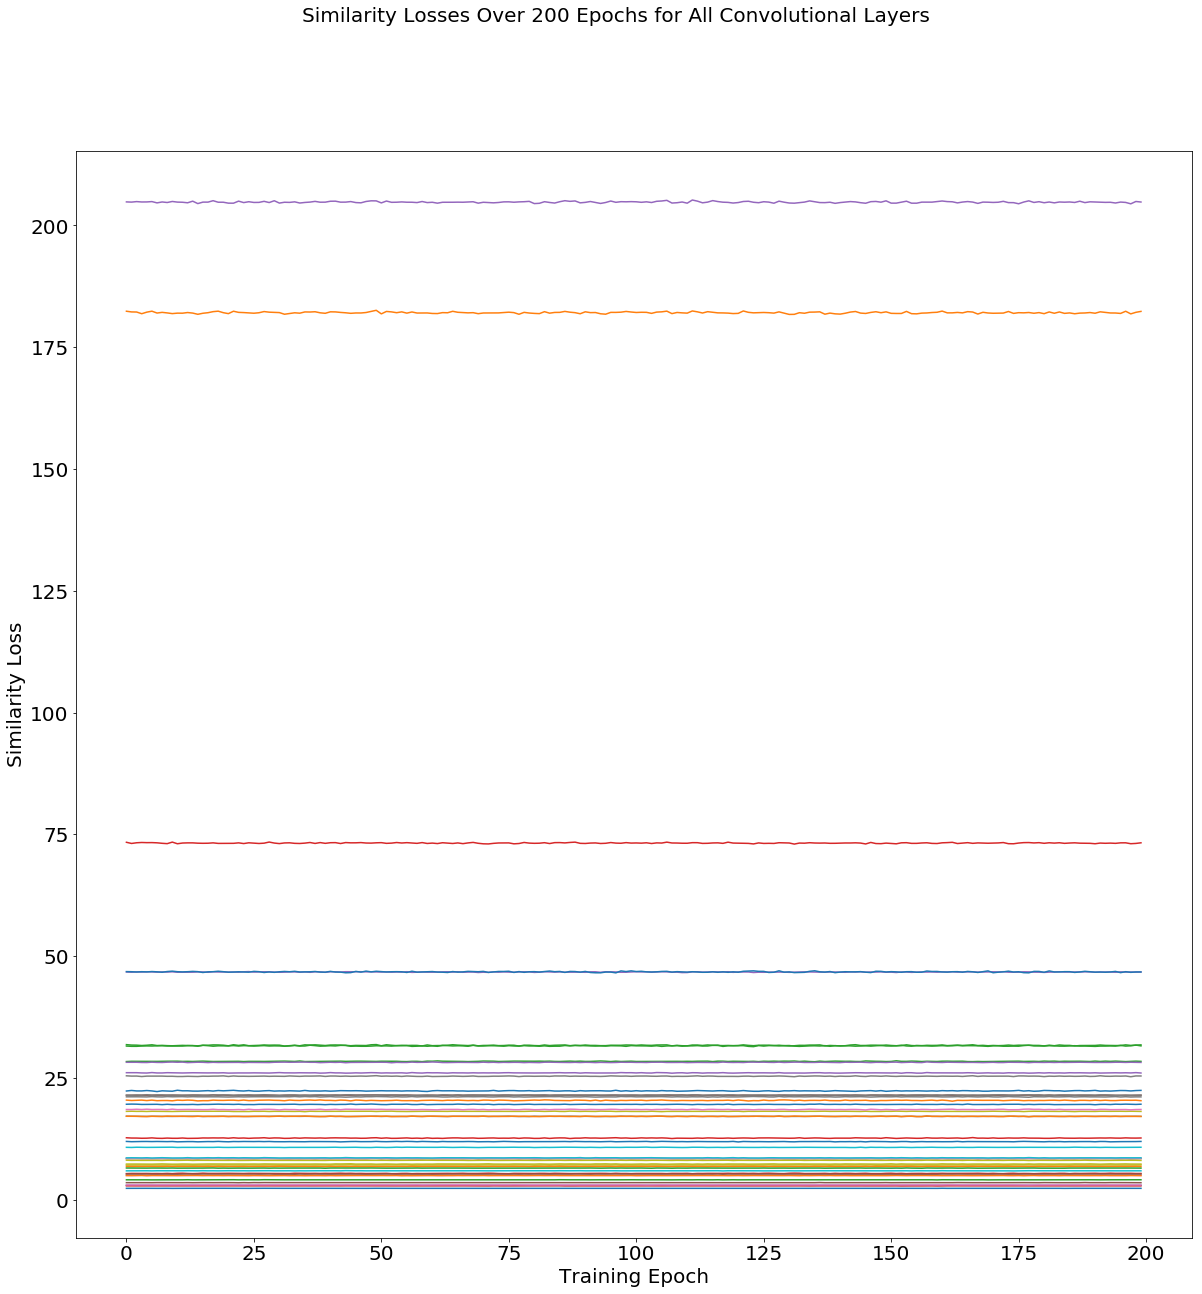

In [11]:
plt.figure(figsize=(20,20))
plt.plot(loss_arr)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("Training Epoch", fontsize=20)
plt.ylabel("Similarity Loss", fontsize=20)
plt.suptitle("Similarity Losses Over 200 Epochs for All Convolutional Layers", fontsize=20)
plt.savefig("Similarity Losses For All Layers")

In [3]:
loss_arr = np.array([loss.detach().cpu().numpy() for loss in losses])

In [96]:
loss_arr.reshape([43,200])

array([[ 19.568724 , 182.38658  ,  31.80661  , ...,   3.4700446,
          8.421204 ,  17.072897 ],
       [  8.052033 ,   5.914548 ,   2.3107011, ...,  11.925507 ,
          4.9317384,  28.398539 ],
       [ 73.3902   ,  46.757915 ,  21.428957 , ...,   7.260519 ,
          8.540789 ,  46.844925 ],
       ...,
       [ 31.533796 ,  12.5902195, 204.71921  , ...,  17.068258 ,
          8.059231 ,   5.89534  ],
       [  2.307292 ,  17.084332 ,   4.043272 , ...,  28.380747 ,
         73.23821  ,  46.75488  ],
       [ 21.377556 ,  18.478636 ,  21.427385 , ...,  46.724094 ,
         20.301262 ,  31.55218  ]], dtype=float32)

In [98]:
loss_arr

array([[ 19.568724, 182.38658 ,  31.80661 , ...,  46.800835,  20.415945,
         31.515575],
       [ 19.60123 , 182.2435  ,  31.720648, ...,  46.778477,  20.338034,
         31.462067],
       [ 19.58408 , 182.22412 ,  31.701534, ...,  46.72001 ,  20.377056,
         31.462599],
       ...,
       [ 19.5536  , 181.84271 ,  31.649971, ...,  46.65152 ,  20.377968,
         31.572052],
       [ 19.533653, 182.1629  ,  31.690428, ...,  46.73379 ,  20.395983,
         31.723003],
       [ 19.579376, 182.3526  ,  31.763065, ...,  46.724094,  20.301262,
         31.55218 ]], dtype=float32)

In [104]:
loss_arr.T[0]

array([19.568724, 19.60123 , 19.58408 , 19.528778, 19.536041, 19.550194,
       19.557901, 19.48905 , 19.560192, 19.49386 , 19.512823, 19.514664,
       19.506706, 19.538689, 19.48973 , 19.541618, 19.533312, 19.565578,
       19.589235, 19.554836, 19.560839, 19.531792, 19.571695, 19.498463,
       19.50909 , 19.494864, 19.552662, 19.545946, 19.536438, 19.541824,
       19.53338 , 19.551682, 19.576633, 19.577662, 19.509708, 19.532751,
       19.553844, 19.54491 , 19.529213, 19.483192, 19.54347 , 19.514006,
       19.53854 , 19.54024 , 19.615807, 19.523779, 19.566366, 19.56484 ,
       19.617102, 19.56646 , 19.50996 , 19.494839, 19.56768 , 19.561373,
       19.555756, 19.597103, 19.514015, 19.509119, 19.582108, 19.491154,
       19.526289, 19.541668, 19.539213, 19.526073, 19.541557, 19.600887,
       19.569044, 19.531075, 19.593447, 19.5651  , 19.53372 , 19.576689,
       19.486809, 19.5526  , 19.535486, 19.56314 , 19.500162, 19.535006,
       19.559597, 19.582863, 19.518013, 19.541569, 

In [109]:
import seaborn as sns

In [33]:
for i,(r,g) in enumerate(zip(matrices_r, matrices_g)):
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42


In [15]:
len(checkpoint1)

1

In [12]:
type(net_rob.module)

networks.resnet.ResNet_2Read

In [17]:
type(net_rob.module) == ResNet_2Read

True

In [23]:
del(net_reg)
del(net_rob)

In [23]:
net_orig

ResNet_2Read(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(16, 16, kernel_size=(1, 1), stride=(1, 1))
      (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (bn2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(16, 64, kernel_size=(1, 1), stride=(1, 1))
      (bn3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (shortcut): Sequential(
        (0): Conv2d(16, 64, kernel_size=(1, 1), stride=(1, 1))
        (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (1): Bottleneck(
      (conv1): Conv2d(64, 16, kernel_size=(1, 1), stride=(1, 1))


In [18]:
loss = torch.zeros(43)

In [33]:
epoch_losses = np.append([epoch_losses], loss)

In [30]:
epoch_losses

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0.])

In [23]:
np.save("test", epoch_losses)

In [2]:
x = torch.rand([128,3,32,32])

In [17]:
x_s = x.view(x.shape[0], -1)

In [23]:
x_s.mean(dim=1, keepdim=True).shape

torch.Size([128, 1])

In [13]:
torch.stack([(i - i.mean())/i.std() for i in x], dim=0)

tensor([[[[-0.5321, -0.2609,  0.9085,  ..., -1.3948,  0.8384,  1.4504],
          [-1.5638, -0.6370,  0.5674,  ..., -1.3083, -0.6288,  0.3573],
          [ 1.4053, -0.8314,  0.3960,  ..., -1.0429,  0.5297,  0.6635],
          ...,
          [-0.2514,  0.5306, -1.4747,  ...,  1.0660, -0.2830,  0.4448],
          [ 0.5980, -0.2406, -1.2421,  ..., -0.5958, -1.3212,  1.3681],
          [-1.5017, -1.1013,  0.4339,  ...,  1.4343, -1.6194,  0.1342]],

         [[-0.8679,  0.5580, -1.2178,  ...,  1.1400, -0.0926,  0.6429],
          [ 0.2169,  0.6719,  1.1979,  ..., -0.2538, -1.5729,  0.0610],
          [ 0.9901,  0.2688, -0.4092,  ..., -1.4460, -1.7149, -0.6622],
          ...,
          [ 1.7008,  1.1930, -0.5806,  ...,  0.8233,  1.0399,  1.6694],
          [-1.6744,  0.4292, -0.6023,  ...,  1.5328,  0.5036,  1.6919],
          [-0.6010,  1.5334,  0.0955,  ..., -0.8417,  0.7330,  1.1156]],

         [[-0.4079, -0.9863, -0.1882,  ...,  1.7246,  0.2410,  0.2048],
          [-0.3164,  0.2549, -

In [14]:
x

tensor([[[[3.4957e-01, 4.2719e-01, 7.6177e-01,  ..., 1.0275e-01,
           7.4171e-01, 9.1684e-01],
          [5.4387e-02, 3.1955e-01, 6.6418e-01,  ..., 1.2749e-01,
           3.2192e-01, 6.0406e-01],
          [9.0393e-01, 2.6393e-01, 6.1513e-01,  ..., 2.0344e-01,
           6.5340e-01, 6.9168e-01],
          ...,
          [4.2989e-01, 6.5365e-01, 7.9865e-02,  ..., 8.0685e-01,
           4.2087e-01, 6.2911e-01],
          [6.7293e-01, 4.3298e-01, 1.4643e-01,  ..., 3.3134e-01,
           1.2379e-01, 8.9328e-01],
          [7.2140e-02, 1.8672e-01, 6.2598e-01,  ..., 9.1224e-01,
           3.8469e-02, 5.4024e-01]],

         [[2.5349e-01, 6.6148e-01, 1.5339e-01,  ..., 8.2802e-01,
           4.7534e-01, 6.8577e-01],
          [5.6388e-01, 6.9407e-01, 8.4458e-01,  ..., 4.2920e-01,
           5.1766e-02, 5.1929e-01],
          [7.8513e-01, 5.7874e-01, 3.8474e-01,  ..., 8.8085e-02,
           1.1138e-02, 3.1235e-01],
          ...,
          [9.8849e-01, 8.4318e-01, 3.3570e-01,  ..., 7.3741

In [26]:
net_orig = ResNet(50,10).cuda()


In [44]:
for i in enumerate(net_orig.named_modules()):
    if('conv' in i[1][0]):
        print(i)

(1, ('conv1', Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))))
(5, ('layer1.0.conv1', Conv2d(16, 16, kernel_size=(1, 1), stride=(1, 1))))
(7, ('layer1.0.conv2', Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))))
(9, ('layer1.0.conv3', Conv2d(16, 64, kernel_size=(1, 1), stride=(1, 1))))
(15, ('layer1.1.conv1', Conv2d(64, 16, kernel_size=(1, 1), stride=(1, 1))))
(17, ('layer1.1.conv2', Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))))
(19, ('layer1.1.conv3', Conv2d(16, 64, kernel_size=(1, 1), stride=(1, 1))))
(23, ('layer1.2.conv1', Conv2d(64, 16, kernel_size=(1, 1), stride=(1, 1))))
(25, ('layer1.2.conv2', Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))))
(27, ('layer1.2.conv3', Conv2d(16, 64, kernel_size=(1, 1), stride=(1, 1))))
(32, ('layer2.0.conv1', Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))))
(34, ('layer2.0.conv2', Conv2d(32, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))))
(36, ('layer2.0.conv3'

In [28]:
x = torch.randn([128,3,32,32])

In [67]:
x_s = x.view(x.shape[0], -1)

In [68]:
x_s.shape

torch.Size([128, 3072])

In [70]:
x_s.mean(dim=1, keepdim=True).shape

torch.Size([128, 1])

In [84]:
y = torch.randn([128,3,32,32]).cuda()

In [30]:
torch.cat((x,y)).shape

RuntimeError: Expected object of backend CPU but got backend CUDA for sequence element 1 in sequence argument at position #1 'tensors'

In [85]:
f = net_orig.conv1(y)

In [86]:
f

tensor([[[[ 5.0070e-01,  1.1294e+00,  1.6922e-01,  ...,  1.1310e-01,
            4.1458e-01,  9.2599e-01],
          [-1.7482e-01, -2.8660e-01, -6.4708e-01,  ..., -3.8396e-01,
            3.2973e-01, -5.2736e-01],
          [ 3.7510e-01,  3.4862e-01, -1.1488e-01,  ...,  8.0493e-01,
            1.5056e-01,  2.4008e-01],
          ...,
          [-3.4219e-01,  3.4279e-01, -4.5907e-01,  ..., -5.1848e-01,
           -7.3981e-01, -4.3080e-01],
          [ 1.6885e-01, -4.5181e-01,  3.6067e-02,  ...,  9.5377e-01,
            4.0194e-01,  7.0808e-01],
          [-5.2857e-02,  2.3870e-01,  8.3384e-01,  ...,  3.7470e-01,
            2.2679e-02, -4.1148e-01]],

         [[ 6.1154e-02,  1.0271e-01,  8.4851e-02,  ...,  4.5738e-01,
            4.9144e-02,  7.5532e-02],
          [ 7.9357e-01,  7.1249e-01,  2.6630e-01,  ...,  3.2771e-01,
           -1.3036e-01, -3.4243e-02],
          [ 3.2649e-01, -1.9759e-01, -7.6830e-01,  ..., -6.0100e-01,
            7.9922e-02,  2.6493e-01],
          ...,
     